### Class1: Class that handles Rolling Hash

In [1]:
class rolling_hash:
    def __init__(self, text, patternSize):
       # print("0.in init")
        self.text = text
        self.patternSize = patternSize
        self.base = 26
        self.window_start = 0
        self.window_end = 0
        self.mod = 5807
        self.hash = self.get_hash(text, patternSize)
        

    def get_hash(self, text, patternSize):
        #print("1.get_hash")
        hash_value = 0
        for i in range(0, patternSize):
            hash_value = (hash_value + (ord(self.text[i]) - 96)*(self.base**(patternSize - i - 1))) % self.mod #mod of pattern hash

        self.window_start = 0
        self.window_end = patternSize

        return hash_value

    def next_window(self):
        #print("2.next_window")
        if self.window_end <= len(self.text) - 1:
            self.hash -= (ord(self.text[self.window_start]) -96)*self.base**(self.patternSize-1)

            self.hash *= self.base
            self.hash += ord(self.text[self.window_end]) - 96
            #print(  ord(self.text[self.window_end])- 96)           #hash end of window
            self.hash %= self.mod                                  #mod hash
            self.window_start += 1
            self.window_end += 1
            return True
        return False


### Class2: Class that handles string preprocessing and similarity calculation

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
# import rabin_karp
import numpy as np
from os.path import dirname, join
import re
import string


class PlagiarismChecker:
    def __init__(self, file_a, file_b,kgram):
        self.file_a = file_a
        self.file_b = file_b
        self.hash_table = {"a": [], "b": []}
        self.k_gram = kgram
        content_a = self.get_file_content(self.file_a)
        content_b = self.get_file_content(self.file_b)
        self.calculate_hash(content_a, "a")
        self.calculate_hash(content_b, "b")
        
        #print(self.hash_table["a"],'\n')     #printing hash tables
        #print(self.hash_table["b"],'\n')
    
        

    def calculate_hash(self, content, doc_type):
        text = self.prepare_content(content)
        text = "".join(text)
        #print(text,'\n')

        text = rolling_hash(text, self.k_gram)                   ### link
        for _ in range(len(content) - self.k_gram + 1):
            self.hash_table[doc_type].append(text.hash)
            if text.next_window() == False:
                break

    def get_rate(self):
        return self.calaculate_plagiarism_rate(self.hash_table)

    def calaculate_plagiarism_rate(self, hash_table):
        th_a = len(hash_table["a"])
        th_b = len(hash_table["b"])
        a = hash_table["a"]
        b = hash_table["b"]
        sh = len(np.intersect1d(a, b))
        # print(sh, a, b)
        #print(sh, th_a, th_b)

        # Formular for plagiarism rate
        # P = (2 * SH / THA * THB ) 100%
        p = (float(2 * sh)/(th_a + th_b)) * 100
        return p

    def get_file_content(self, filename):
        file = open(filename, 'r+', encoding="utf-8")
        return file.read()

    def prepare_content(self, content):
        content=content.translate(str.maketrans('', '', string.punctuation))
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(content)
        filtered_content = []
        porter = PorterStemmer()
        for w in word_tokens:
            if w not in stop_words:
                w = w.lower()
                word = porter.stem(w)
                filtered_content.append(word)
    
        return filtered_content
    





### Note for backend: just try to form an algorithm to access paths of all possible file combination and pass it to the following function, import first two classes and ignore rest of the kernels

In [3]:
from pathlib import Path
# file1 = Path("a.txt")
# file2 = Path("b.txt")

def Rabin_Karp(file1,file2):
    kgrams=10
    checker = PlagiarismChecker(file1,file2,50)
    rate=checker.get_rate()
    print('Similarity: ',rate,'%')
    return rate

#Rabin_Karp(file1,file2)

###  For one value of k-gram

In [4]:
from pathlib import Path
# file1 = Path("C:/Users/Shawn Frost/Desktop/BTP/a.txt")
# file2 = Path("C:/Users/Shawn Frost/Desktop/BTP/b.txt")
file1 = Path("a.txt")
file2 = Path("b.txt")

checker = PlagiarismChecker(file1,file2,50) #f1,f2,kgram
# PlagiarismChecker.printme()
print('Similarity: ',checker.get_rate(),'%')

Similarity:  46.76923076923077 %


### For a range of kgram values

Text(0.5, 1.0, 'k-gram vs %similairty')

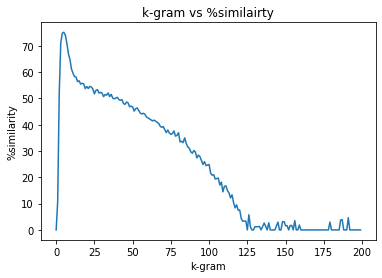

In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
file1 = Path("a.txt")
file2 = Path("b.txt")
val=[0]
for x in range(1,200):
    val.append(PlagiarismChecker(file1,file2,x).get_rate())
   # print(x,val[x])
plt.plot(val)
plt.xlabel('k-gram')
plt.ylabel('%similarity')
plt.title('k-gram vs %similairty')

In [6]:
#PlagiarismChecker(file1,file2,100).hash_table['a']

### Content of uploaded two files

In [7]:
file1 = Path("a.txt")
file2 = Path("b.txt")

In [8]:
f=open(file1,'r')
f.read()

'Lemmatization considers the context and converts the word to its\n meaningful base form, which is called Lemma. \n\nSometimes, the same word can have multiple different Lemmas. \nLemmatization usually refers to doing things properly with the \nuse of a vocabulary and morphological analysis of words, normally \naiming to remove inflectional endings only and to return the base \nor dictionary form of a word, which is known as the lemma.'

In [9]:
f2=open(file2,'r')
f2.read()

'Lemmatization converts a word to its base form in a\nmeaningful way by considering the context. This base \nform is also called lemma. A word can have more than \none Lemmas sometimes. Lemmatization usually refers to\n doing things properly with the use of a vocabulary and \nmorphological analysis of words, normally aiming to \nremove inflectional endings only and to return the base \nor dictionary form of a word, which is known as the lemma.'